# Natural Language Processing
![](https://i.imgur.com/qkg2E2D.png)

## Assignment 004 - BERT-based NER Tagger

> Notebook by:
> - NLP Course Stuff
## Revision History

| Version | Date       | User        | Content / Changes                                                   |
|---------|------------|-------------|---------------------------------------------------------------------|
| 0.1.000 | 09/06/2024 | course staff| First version                                                       |


## Overview
In this assignment, you will further work on assignment 3, that is, you will build a complete training and testing pipeline for a neural sequential tagger for named entities using BERT, this time.

**This assignment is not mandatory, we will take the 3/4 best grades, but we recomment you doing it.**

## Dataset
You will work with the ReCoNLL 2003 dataset, a corrected version of the [CoNLL 2003 dataset](https://www.clips.uantwerpen.be/conll2003/ner/):

**Click on those links so you have access to the data!**
- [Train data](https://drive.google.com/file/d/1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf/view?usp=sharing)

- [Dev data](https://drive.google.com/file/d/1rdUida-j3OXcwftITBlgOh8nURhAYUDw/view?usp=sharing)

- [Test data](https://drive.google.com/file/d/137Ht40OfflcsE6BIYshHbT5b2iIJVaDx/view?usp=sharing)

As you will see, the annotated texts are labeled according to the `IOB` annotation scheme (more on this below), for 3 entity types: Person, Organization, Location.

## Your Implementation

Please create a local copy of this template Colab's Notebook:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1KGkObwUn5QQm_v0nB0nAUlB4YrwThuzl#scrollTo=Z-fCqGh9ybgm)

The assignment's instructions are there; follow the notebook.

## Submission
- **Notebook Link**: Add the URL to your assignment's notebook in the `notebook_link.txt` file, following the format provided in the example.
- **Access**: Ensure the link has edit permissions enabled to allow modifications if needed.
- **Deadline**: <font color='green'>27/06/2024</font>.
- **Platform**: Continue using GitHub for submissions. Push your project to the team repository and monitor the test results under the actions section.

Good Luck 🤗


<!-- ## NER schemes:  

> `IO`: is the simplest scheme that can be applied to this task. In this scheme, each token from the dataset is assigned one of two tags: an inside tag (`I`) and an outside tag (`O`). The `I` tag is for named entities, whereas the `O` tag is for normal words. This scheme has a limitation, as it cannot correctly encode consecutive entities of the same type.

> `IOB`: This scheme is also referred to in the literature as BIO and has been adopted by the Conference on Computational Natural Language Learning (CoNLL) [1]. It assigns a tag to each word in the text, determining whether it is the beginning (`B`) of a known named entity, inside (`I`) it, or outside (`O`) of any known named entities.

> `IOE`: This scheme works nearly identically to `IOB`, but it indicates the end of the entity (`E` tag) instead of its beginning.

> `IOBES`: An alternative to the IOB scheme is `IOBES`, which increases the amount of information related to the boundaries of named entities. In addition to tagging words at the beginning (`B`), inside (`I`), end (`E`), and outside (`O`) of a named entity. It also labels single-token entities with the tag `S`.

> `BI`: This scheme tags entities in a similar method to `IOB`. Additionally, it labels the beginning of non-entity words with the tag B-O and the rest as I-O.

> `IE`: This scheme works exactly like `IOE` with the distinction that it labels the end of non-entity words with the tag `E-O` and the rest as `I-O`.

> `BIES`: This scheme encodes the entities similar to `IOBES`. In addition, it also encodes the non-entity words using the same method. It uses `B-O` to tag the beginning of non-entity words, `I-O` to tag the inside of non-entity words, and `S-O` for single non-entity tokens that exist between two entities. -->


## NER Schemes

### IO
- **Description**: The simplest scheme for named entity recognition (NER).
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
- **Limitation**: Cannot correctly encode consecutive entities of the same type.

### IOB (BIO)
- **Description**: Adopted by the Conference on Computational Natural Language Learning (CoNLL).
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
- **Advantage**: Can encode the boundaries of consecutive entities.

### IOE
- **Description**: Similar to IOB, but indicates the end of an entity.
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
- **Advantage**: Focuses on the end boundary of entities.

### IOBES
- **Description**: An extension of IOB with additional boundary information.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `S`: Single-token named entity.
- **Advantage**: Provides more detailed boundary information for named entities.

### BI
- **Description**: Tags entities similarly to IOB and labels the beginning of non-entity words.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `B-O`: Beginning of a non-entity word.
  - `I-O`: Inside a non-entity word.
- **Advantage**: Distinguishes the beginning of non-entity sequences.

### IE
- **Description**: Similar to IOE but for non-entity words.
- **Tags**:
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `E-O`: End of a non-entity word.
  - `I-O`: Inside a non-entity word.
- **Advantage**: Highlights the end of non-entity sequences.

### BIES
- **Description**: Encodes both entities and non-entity words using the IOBES method.
- **Tags**:
  - `B`: Beginning of a named entity.
  - `I`: Inside a named entity.
  - `O`: Outside any named entity.
  - `E`: End of a named entity.
  - `S`: Single-token named entity.
  - `B-O`: Beginning of a non-entity word.
  - `I-O`: Inside a non-entity word.
  - `S-O`: Single non-entity token.
- **Advantage**: Comprehensive encoding for both entities and non-entities.




In [ ]:
!mkdir data
# Fetch data
# train_link = 'https://drive.google.com/file/d/1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf/view?usp=sharing'
# dev_link   = 'https://drive.google.com/file/d/1rdUida-j3OXcwftITBlgOh8nURhAYUDw/view?usp=sharing'
# test_link  = 'https://drive.google.com/file/d/137Ht40OfflcsE6BIYshHbT5b2iIJVaDx/view?usp=sharing'

!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1CqEGoLPVKau3gvVrdG6ORyfOEr1FSZGf' -O data/train.txt
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rdUida-j3OXcwftITBlgOh8nURhAYUDw' -O data/dev.txt
!wget -q --no-check-certificate 'https://docs.google.com/uc?export=download&id=137Ht40OfflcsE6BIYshHbT5b2iIJVaDx' -O data/test.txt


mkdir: cannot create directory ‘data’: File exists


In [ ]:
# Any additional needed libraries
!pip install -qU transformers[torch] wandb
!pip install -qU transformers[torch] accelerate
!pip install --upgrade wandb transformers

In [ ]:
# Standard Library Imports
import os
import copy
import random
import warnings
from collections import defaultdict
from typing import Optional
import json
from google.colab import files

# ML
import numpy as np
import scipy as sp
import pandas as pd

# Visual
import matplotlib
import seaborn as sns
from tqdm import tqdm
from tabulate import tabulate
import matplotlib.pyplot as plt
from IPython.display import display

# DL
import torch as th
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import DataLoader, Dataset
from transformers import AutoTokenizer, AutoModelForTokenClassification, TrainingArguments, Trainer
import wandb


# Metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score , roc_auc_score, classification_report, confusion_matrix, precision_recall_fscore_support


In [ ]:
model_name = 'bert-base-uncased'
SEED = 42
# Set the random seed for Python
random.seed(SEED)

# Set the random seed for numpy
np.random.seed(SEED)

# Set the random seed for pytorch
th.manual_seed(SEED)

# If using CUDA (for GPU operations)
th.cuda.manual_seed(SEED)

# Set up the device
DEVICE = "cuda" if th.cuda.is_available() else "cpu"
# assert DEVICE == "cuda"

DataType = dict[str, list[list[str]]]

# Part 1 - Dataset Preparation

## Step 1: Read Data
Write a function for reading the data from a single file (of the ones that are provided above).   
- The function recieves a filepath
- The funtion encodes every sentence individually using a pair of lists, one list contains the words and one list contains the tags.
- The function returns a dictionary of the texts as a list and the tags as a list.

Example output:
```
{
  "texts": [
    ['At','Trent','Bridge',':'],
    ...],
  "tags":[
    ['O','B-LOC','I-LOC ','O'],
    ...]
  ...
}
```

In [ ]:
def read_data(filepath:str) -> DataType:
  """
  Read data from a single file.
  The function recieves a filepath
  The funtion encodes every sentence using a pair of lists, one list contains the words and one list contains the tags.
  :param filepath: path to the file
  :return: data as a list of tuples
  """
  data = {
    "texts": [],
    "tags": []
  }
  # TO DO ----------------------------------------------------------------------
  with open(filepath, 'r') as f:
    lines = f.readlines()
    text = []
    tags = []
    # iterate all the tags and words and add them to seperate lists
    for line in lines:
      if line == '\n': # New sentence starts after an empty line
        data['texts'].append(text)
        data['tags'].append(tags)
        text = []
        tags = []
      else:
        word, tag = line.strip().split()
        text.append(word)
        tags.append(tag)

    # To handle the last sentence in the file if there's no trailing newline
    if text and tags:
      data['texts'].append(text)
      data['tags'].append(tags)
  # TO DO ----------------------------------------------------------------------

  return data

In [ ]:
train_raw = read_data("data/train.txt")
dev_raw = read_data("data/dev.txt")
test_raw = read_data("data/test.txt")

print(f"Train size: {len(train_raw['texts'])}")
print(f"Dev size: {len(dev_raw['texts'])}")
print(f"Test size: {len(test_raw['texts'])}")

Train size: 1750
Dev size: 250
Test size: 500


## Step 2: Prepare Data
Write a function `prepare_data` that takes one of the [train, dev, test], and encodes it to tensors.

### Your Task
1. Load the BERT Tokenizer
2. Tokenize the data and encode the labels

In [ ]:
# Prepare tag2id dictionaries
tag2id = {}
id2tag = {}
tags = ["O", "B-PER", "I-PER", "B-LOC", "I-LOC", "B-ORG", "I-ORG"]
for tag in tags:
  tag2id[tag] = len(tag2id)
  id2tag[len(id2tag)] = tag

In [ ]:
tag2id

{'O': 0,
 'B-PER': 1,
 'I-PER': 2,
 'B-LOC': 3,
 'I-LOC': 4,
 'B-ORG': 5,
 'I-ORG': 6}

In [ ]:
tokenizer = None
# TO DO ----------------------------------------------------------------------

# Load the tokenizer for BERT
tokenizer = AutoTokenizer.from_pretrained(model_name)

# TO DO ----------------------------------------------------------------------
tokenizer

BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
def prepare_data(data: DataType, tag2id: dict[str, int]) -> dict[str, th.Tensor]:
  enc_data = {
    "texts": None,
    "labels": None
  }
  # TO DO ----------------------------------------------------------------------
  # Tokenize the data and encode the labels
  encodings = tokenizer(data['texts'], is_split_into_words=True, padding=True, truncation=True, return_tensors='pt')
  enc_data['texts'] = encodings['input_ids']
  enc_data['attention_mask'] = encodings['attention_mask']
  enc_data['labels'] = []

  for i, tags in enumerate(data['tags']):
      label_ids = []
      word_ids = encodings.word_ids(batch_index=i)
      previous_word_idx = None

      for word_id in word_ids:
          if word_id is None:
              label_ids.append(-100)  # Special value to ignore in loss calculation
          elif word_id != previous_word_idx:
              label_ids.append(tag2id[tags[word_id]])
          else:
              label_ids.append(-100)  # Ignore subword tokens
          previous_word_idx = word_id

      enc_data['labels'].append(label_ids)

  enc_data['labels'] = th.tensor(enc_data['labels'], dtype=th.long)
  # TO DO ----------------------------------------------------------------------

  return enc_data

In [ ]:
train_sequences = prepare_data(train_raw, tag2id)
dev_sequences = prepare_data(dev_raw, tag2id)
test_sequences = prepare_data(test_raw, tag2id)

In [ ]:
# print(f"Train labels shape: {train_sequences['labels'].shape}")
# print(f"Dev texts shape: {dev_sequences['texts'].shape}")

## Step 3: Dataset
Create datasets for each split in the dataset. They should return the samples as Tensors.


In [ ]:
class NERDataset(Dataset):
    # TO DO ----------------------------------------------------------------------
    def __init__(self, encodings):
        self.encodings = encodings

    def __len__(self):
        return len(self.encodings['texts'])

    def __getitem__(self, idx):
        item = {
            "input_ids": self.encodings['texts'][idx].clone().detach(),
            "attention_mask": self.encodings['attention_mask'][idx].clone().detach(),
            "labels": self.encodings['labels'][idx].clone().detach()
        }
        return item

In [ ]:
train_ds = None
dev_ds = None
test_ds = None
# TO DO ----------------------------------------------------------------------
train_ds = NERDataset(train_sequences)
dev_ds = NERDataset(dev_sequences)
test_ds = NERDataset(test_sequences)
# TO DO ----------------------------------------------------------------------

<br><br><br><br><br><br>

# Part 2 - NER Model Training

## Step 1: Load Model

Load a token classification model.

In [ ]:
model = None
def load_model(model_name: str, tag2id) -> nn.Module:
# TO DO ----------------------------------------------------------------------
#   Load the model from the transformers library
    model = AutoModelForTokenClassification.from_pretrained(model_name, num_labels=len(tag2id))

    return model
# TO DO ----------------------------------------------------------------------
model = load_model(model_name, tag2id)
model

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForTokenClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

## Step 2: Training

Write a training function that utilizes the huggingface Trainer. The function should log the loss of both train dataset and the dev one every here and there.

In [ ]:
N_EPOCHS = 5
# TO DO ----------------------------------------------------------------------
BATCH_SIZE = 16
# TO DO ----------------------------------------------------------------------

In [ ]:
# Initialize Weights and Biases
wandb.login()
# API = 566312b1092c2dd88f8f6e0e9e2cb49abad25446

# Start a new W&B run
wandb.init(project="ner", name="training")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


eval/loss,█▃▂▁▂
eval/runtime,▁▂▂▃█
eval/samples_per_second,█▇▇▆▁
eval/steps_per_second,█▇▇▆▁
train/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
train/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
train/grad_norm,▄▃▄▅▄█▄▂▃▄▄▄▃▃▃▂▁▁▂▃▁▁▃▁▁▂▃▁▁▁▂▁▁▁▂▃▁▁▁▁
train/learning_rate,███▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
train/loss,█▄▃▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/loss,0.04879
eval/runtime,0.9043


In [ ]:
def train_model(model, n_epochs: int, batch_size: int, train_ds: Dataset, dev_ds: Dataset) -> Trainer:
  """
  Train a model.
  :param model: model instance
  :param n_epochs: number of epochs to train on
  :param batch_size: batch size
  :param train_ds: train dataset
  :param dev_ds: dev dataset
  :return: loss and accuracy during training
  """
  # TO DO ----------------------------------------------------------------------

  # Training arguments
  training_args = TrainingArguments(
      output_dir='./results',
      num_train_epochs=n_epochs,
      per_device_train_batch_size=batch_size,
      per_device_eval_batch_size=batch_size,
      logging_dir='./logs',
      logging_steps=10,
      load_best_model_at_end=True,
      report_to='wandb',
      evaluation_strategy='epoch',
      save_strategy='epoch',
  )

  # Start a new W&B run
  wandb.init(project="ner", name="training")

  # Trainer
  trainer = Trainer(
      model=model,
      tokenizer=tokenizer,
      args=training_args,
      train_dataset=train_ds,
      eval_dataset=dev_ds,
  )

  # Train the model
  trainer.train()


  return trainer
  # TO DO ----------------------------------------------------------------------

In [ ]:
wandb.watch(model, log_freq=15)
trainer = train_model(model, N_EPOCHS, BATCH_SIZE, train_ds, dev_ds)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'weight_decay' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'num_train_epochs' was locked by 'sweep' (ignored update).


Epoch,Training Loss,Validation Loss
1,0.060400,0.069889
2,0.041800,0.052894
3,0.013300,0.045173
4,0.004800,0.046138
5,0.001800,0.045737


<br><br><br><br><br><br>

# Part 3 - Evaluation


## Step 1: Evaluation Function

Write an evaluation function for a trained model using the dev and test datasets. This function will print the `Recall`, `Precision`, and `F1` scores and plot a `Confusion Matrix`.

Perform this evaluation twice:
1. For all labels (7 labels in total).
2. For all labels except "O" (6 labels in total).

## Metrics and Display

### Metrics
- **Recall**: True Positive Rate (TPR), also known as Recall.
- **Precision**: The opposite of False Positive Rate (FPR), also known as Precision.
- **F1 Score**: The harmonic mean of Precision and Recall.

*Note*: For all these metrics, use **weighted** averaging:
Calculate metrics for each label, and find their average weighted by support. Refer to the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support) for more details.

### Display
1. Print the `Recall`, `Precision`, and `F1` scores in a tabulated format.
2. Display a `Confusion Matrix` plot:
   - Rows represent the predicted labels.
   - Columns represent the true labels.
   - Include a title for the plot, axis names, and the names of the tags on the X-axis.

In [ ]:
def evaluate(trainer: Trainer, title: str, dataset: Dataset, tag2id: dict[str, int]):
  """
  Evaluate a trained model on the given dataset.
  :param trainer: trainer instance containing a trained model
  :param title: title for the plot
  :param dataset: dataset
  :param tag2id: tag2id dictionary
  :return: Dictionary of evaluation results
  """
  results = {}
# TO DO ----------------------------------------------------------------------
  results = {
      'with O': {
          'true': [],
          'pred': [],
          'scores': []
      },
      'without O': {
          'true': [],
          'pred': [],
          'scores': []
      }
  }
  id2tag = {v: k for k, v in tag2id.items()}

  trainer.model.to(DEVICE)

  # Iterate through each item in the dataset
  for item in DataLoader(dataset, batch_size=1):
      input_ids = item['input_ids'].to(DEVICE)
      attention_mask = item['attention_mask'].to(DEVICE)
      labels = item['labels'].to(DEVICE)

      # Perform forward pass without gradient computation
      with th.no_grad():
          outputs = trainer.model(input_ids, attention_mask=attention_mask, labels=labels)
          logits = outputs.logits
          preds = th.argmax(logits, dim=-1)

      # Process each token in the batch
      for i in range(input_ids.size(1)):
          true_label_id = labels[0, i].item()
          pred_label_id = preds[0, i].item()

          # Skip padding tokens
          if true_label_id == -100:
              continue

          # Convert label IDs to tag labels using tag2id dictionar
          true_tag = id2tag[true_label_id]
          pred_tag = id2tag[pred_label_id]

          # Collect results based on presence or absence of 'O' tags
          if true_tag != 'O':
              results['without O']['true'].append(true_tag)
              results['without O']['pred'].append(pred_tag)
              results['without O']['scores'].append(logits[0, i].cpu().numpy())

          results['with O']['true'].append(true_tag)
          results['with O']['pred'].append(pred_tag)
          results['with O']['scores'].append(logits[0, i].cpu().numpy())

  # Iterate through results and compute metrics
  for t in results:
      # get the metrics result
      if not results[t]['true']:
        results[t]['precision'], results[t]['recall'], results[t]['f1_score'] = 0, 0, 0
        continue
      results[t]['precision'], results[t]['recall'], results[t]['f1_score'], _ = precision_recall_fscore_support(results[t]['true'], results[t]['pred'], average='weighted',  zero_division=0)
      report = classification_report(results[t]['true'], results[t]['pred'],  zero_division=0)
      print(f'Classification Report {t} For {title}')
      print(report)
      # plot the confusion matrix
      labels = sorted(list(set(results[t]['true'])))

      cm = confusion_matrix(results[t]['true'], results[t]['pred'])
      plt.figure(figsize=(10, 10))
      print()
      sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
      plt.xlabel('Actual')
      plt.ylabel('Predicted')
      plt.title(f'Confusion Matrix for {title} {t}')
      plt.show()
  results = {
  'RECALL': results['with O']['recall'],
  'PERCISION': results['with O']['precision'],
  'F1': results['with O']['f1_score'],
  'RECALL_WO_O': results['without O']['recall'],
  'PERCISION_WO_O': results['without O']['precision'],
  'F1_WO_O': results['without O']['f1_score']
}

  # TO DO ----------------------------------------------------------------------
  return results


Classification Report with O For Evaluation on Dev Set
              precision    recall  f1-score   support

       B-LOC       0.96      0.97      0.96       183
       B-ORG       0.91      0.95      0.93       168
       B-PER       0.99      0.97      0.98       200
       I-LOC       0.95      0.91      0.93        23
       I-ORG       0.96      0.96      0.96       116
       I-PER       0.99      1.00      1.00       157
           O       1.00      0.99      0.99      3096

    accuracy                           0.99      3943
   macro avg       0.97      0.96      0.97      3943
weighted avg       0.99      0.99      0.99      3943




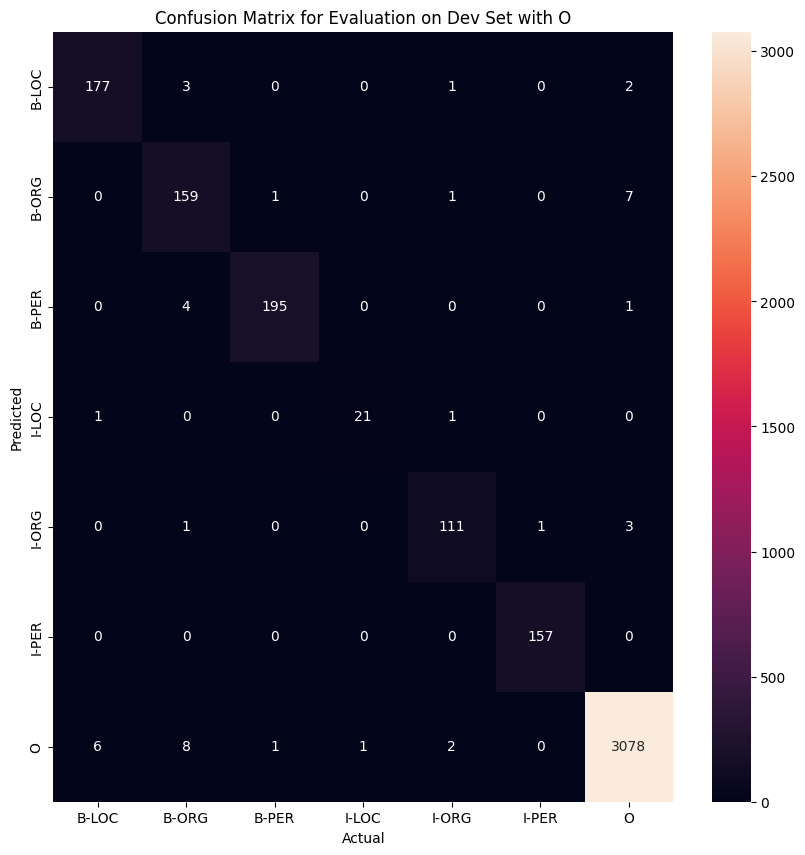

Classification Report without O For Evaluation on Dev Set
              precision    recall  f1-score   support

       B-LOC       0.99      0.97      0.98       183
       B-ORG       0.95      0.95      0.95       168
       B-PER       0.99      0.97      0.98       200
       I-LOC       1.00      0.91      0.95        23
       I-ORG       0.97      0.96      0.97       116
       I-PER       0.99      1.00      1.00       157
           O       0.00      0.00      0.00         0

    accuracy                           0.97       847
   macro avg       0.84      0.82      0.83       847
weighted avg       0.98      0.97      0.98       847




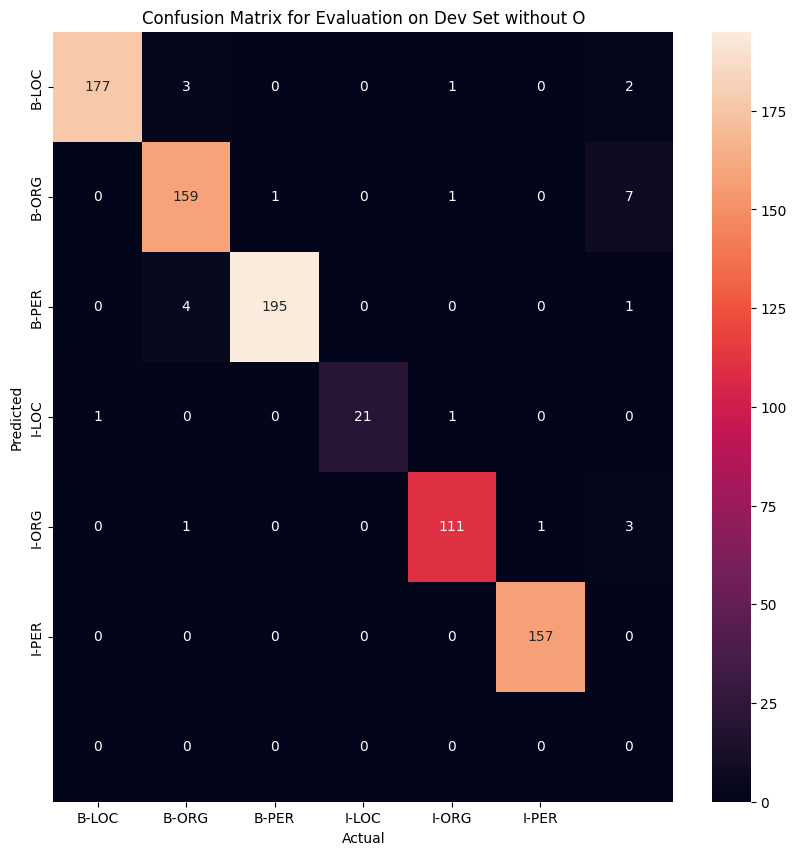

In [ ]:
# Assuming model is trained, and dl_dev is the DataLoader for dev dataset
results = evaluate(trainer, "Evaluation on Dev Set", dev_ds, tag2id)

## Step 2 - Logs and Visualization
Explore and intagrate [wandb](https://wandb.ai/home) as a logging and visualization tool. Integrate it in the training and evaluation steps. Look for the plots of the loss (train, eval) and see how useful it can be :) Also make sure to log some results, such as plots and funal results before printing.

In [ ]:
# Plots of the lost (training and validation) and the accuracy (validation) using wandb
wandb.finish()

eval/loss,█▃▁▁▁
eval/runtime,▄▁▃▇█
eval/samples_per_second,▅█▆▂▁
eval/steps_per_second,▅█▆▂▁
train/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
train/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇████
train/grad_norm,▇▅▇▇▅█▃▄█▄▇▄▃▅▄▄▃▁▃▃▁▄▆▃▂▁▃▇▂▄▁▁▁▁▂▁▁▁▁▁
train/learning_rate,███▇▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
train/loss,█▄▄▃▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/loss,0.04574
eval/runtime,0.8959


## Step 3: Development
Experiment your training with diffenet Hyperparameters and optimize them based on the results on the **development set**.

Decide which model performs the best. Note that this time the parameters changes will be inside the model initialization or the train functions and will not be given as parameters to the load_model function. So just hard-code them in the other functions.

In [ ]:
# TO DO ----------------------------------------------------------------------
# Sweep configuration for hyperparameter optimization
sweep_configuration = {
    # 'method': 'bayes',
    'method': 'grid',
    'metric': {
        'name': 'eval_loss',
        'goal': 'minimize'
    },
    'parameters': {
        'learning_rate': {
            'values': [5e-5, 1e-5]#, 5e-4]
        },
        'batch_size': {
            'values': [8, 16]#, 32]
        },
        'num_train_epochs': {
            'values': [3]#, 5]
        },
        'weight_decay': {
            'values': [0.0]#, 0.01]
        }
    }
}

# Define training function to accept hyperparameters (original train_model does not get learning_rate as hyperparameter)
def sweep_train_model():
    with wandb.init():
        config = wandb.config

        # Load the model inside the function to ensure it's fresh each time
        model = load_model(model_name, tag2id)

        training_args = TrainingArguments(
            output_dir='./results',
            num_train_epochs=config.num_train_epochs,
            per_device_train_batch_size=config.batch_size,
            per_device_eval_batch_size=config.batch_size,
            learning_rate=config.learning_rate,
            weight_decay=config.weight_decay,
            logging_dir='./logs',
            logging_steps=10,
            load_best_model_at_end=True,
            report_to='wandb',
            eval_strategy='epoch',
            save_strategy='epoch',
        )

        trainer = Trainer(
            model=model,
            args=training_args,
            train_dataset=train_ds,
            eval_dataset=dev_ds
        )

        trainer.train()

# Initialize W&B project and sweep
wandb.login()
wandb.init(project="ner", name="hyperparameter_tuning", mode="disabled")
sweep_id = wandb.sweep(sweep=sweep_configuration, project="ner")
# Execute the sweep
wandb.agent(sweep_id, function=sweep_train_model)

# TO DO ----------------------------------------------------------------------

wandb: WARNING Ignored wandb.init() arg project when running a sweep.
wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Create sweep with ID: 7q9xduvz
Sweep URL: https://wandb.ai/klil_halahmi/ner/sweeps/7q9xduvz


wandb: Agent Starting Run: 5lhd3jmm with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 5e-05
wandb: 	num_train_epochs: 3
wandb: 	weight_decay: 0


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'weight_decay' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'num_train_epochs' was locked by 'sweep' (ignored update).


Epoch,Training Loss,Validation Loss
1,0.035400,0.076049
2,0.032000,0.047301
3,0.004600,0.045571


eval/loss,█▁▁
eval/runtime,▄█▁
eval/samples_per_second,▅▁█
eval/steps_per_second,▅▁█
train/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
train/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
train/grad_norm,█▄▄▃▃▅▅▃▃▂▁█▂▂▂▆▁▂▂▄▂▁▃▁▄▂▂▁▄▁▂▁▁▂▅▃▁▂▁▃
train/learning_rate,████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
train/loss,█▅▃▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/loss,0.04557
eval/runtime,0.9334


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: u2h3mexw with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 1e-05
wandb: 	num_train_epochs: 3
wandb: 	weight_decay: 0


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'weight_decay' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'num_train_epochs' was locked by 'sweep' (ignored update).


Epoch,Training Loss,Validation Loss
1,0.160100,0.137907
2,0.079500,0.084862
3,0.039000,0.072201


eval/loss,█▂▁
eval/runtime,█▆▁
eval/samples_per_second,▁▃█
eval/steps_per_second,▁▃█
train/epoch,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
train/global_step,▁▁▁▂▂▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇███
train/grad_norm,█▃▂▂▂▂▂▂▅▂▂▂▃▃▃▃▄▂▅▃▂▂▃▂▁▂▄▁▃▂▃▄▃▃▂▂▁▃▁▄
train/learning_rate,████▇▇▇▇▇▆▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
train/loss,█▆▄▄▃▃▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/loss,0.0722
eval/runtime,0.9242


wandb: Agent Starting Run: do977zhy with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 5e-05
wandb: 	num_train_epochs: 3
wandb: 	weight_decay: 0


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'weight_decay' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'num_train_epochs' was locked by 'sweep' (ignored update).


Epoch,Training Loss,Validation Loss
1,0.050300,0.067542
2,0.032600,0.048007
3,0.012600,0.044955


eval/loss,█▂▁
eval/runtime,█▁▃
eval/samples_per_second,▁█▆
eval/steps_per_second,▁█▆
train/epoch,▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇█████
train/global_step,▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇█████
train/grad_norm,▄▃▃▅▄▃▅▄▃▂▇▄▆▃▃▄█▂▅▆▃▂▂▁▃▇▄▂▂▂▃▅▁
train/learning_rate,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
train/loss,█▄▃▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/loss,0.04496
eval/runtime,0.8625


wandb: Agent Starting Run: kj3lprug with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 1e-05
wandb: 	num_train_epochs: 3
wandb: 	weight_decay: 0


Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'weight_decay' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'num_train_epochs' was locked by 'sweep' (ignored update).


Epoch,Training Loss,Validation Loss
1,0.226200,0.218727
2,0.122700,0.124855
3,0.089500,0.102872


eval/loss,█▂▁
eval/runtime,▆▁█
eval/samples_per_second,▃█▁
eval/steps_per_second,▃█▁
train/epoch,▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▅▅▅▅▆▆▆▆▆▆▇▇▇▇█████
train/global_step,▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇█████
train/grad_norm,█▅▆▂▂▂▂▃▂▃▂▃▂▄▃▃▄▁▃▂▁▁▄▃▃▇▃▁▃▂▂▃▂
train/learning_rate,███▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▃▃▃▃▃▂▂▂▂▁▁▁
train/loss,█▅▄▄▃▃▂▂▂▂▂▂▂▁▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
eval/loss,0.10287
eval/runtime,0.8947


wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


## Step 4 - Final Evaluation
After configring your params such that the model loaded is the best one,train it, evaluate it on the test set and print the results. This part simulates the real world data.

Best run ID: do977zhy
Best learning rate: 5e-05
Best batch size: 16
Best number of epochs: 3
Best weight decay: 0
Best model path: /content/results/checkpoint-657
Evaluation Summary:
Results for with O
              precision    recall  f1-score   support

       B-LOC       0.82      0.91      0.87       343
       B-ORG       0.83      0.85      0.84       350
       B-PER       0.96      0.97      0.96       434
       I-LOC       0.75      0.06      0.11        53
       I-ORG       0.71      0.81      0.76       200
       I-PER       0.99      0.95      0.97       296
           O       0.99      0.99      0.99      6567

    accuracy                           0.97      8243
   macro avg       0.87      0.79      0.79      8243
weighted avg       0.97      0.97      0.97      8243

Accuracy: 0.9674875652068422
ROC AUC: 0.9938750268407853


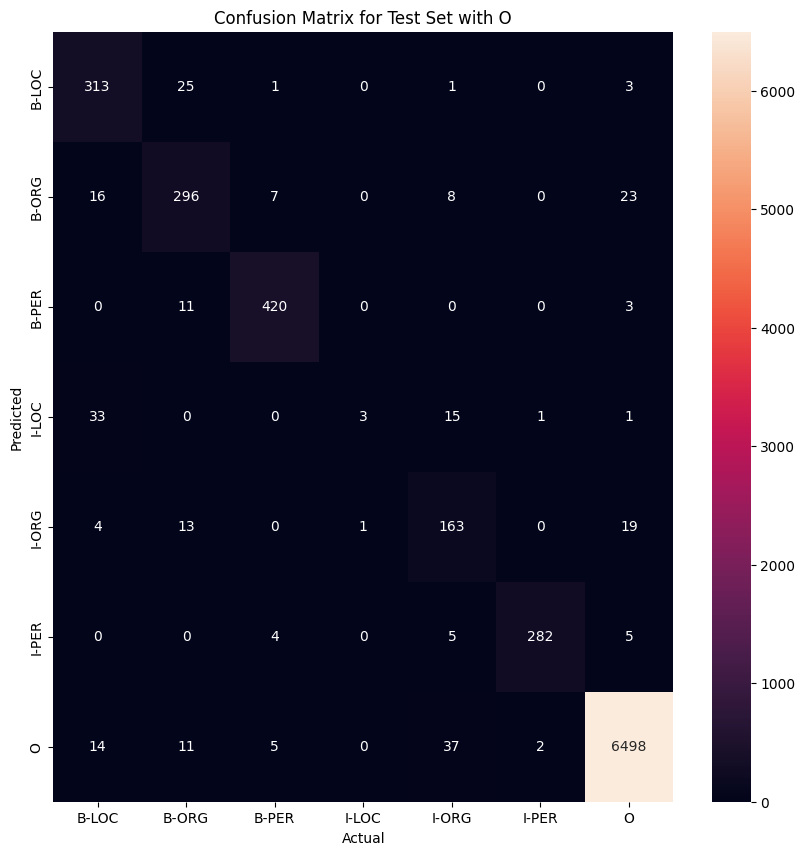



Results for without O
              precision    recall  f1-score   support

       B-LOC       0.86      0.91      0.88       343
       B-ORG       0.86      0.85      0.85       350
       B-PER       0.97      0.97      0.97       434
       I-LOC       0.75      0.06      0.11        53
       I-ORG       0.85      0.81      0.83       200
       I-PER       1.00      0.95      0.97       296
           O       0.00      0.00      0.00         0

    accuracy                           0.88      1676
   macro avg       0.75      0.65      0.66      1676
weighted avg       0.91      0.88      0.88      1676

Accuracy: 0.8812649164677804
ROC AUC calculation failed: Only one class present in y_true. ROC AUC score is not defined in that case.


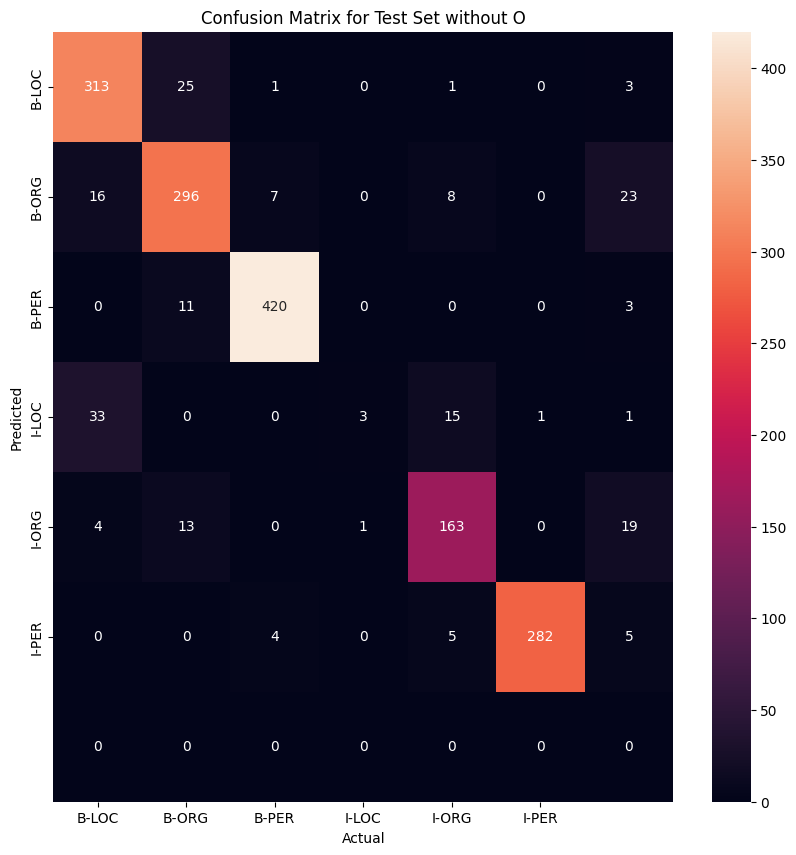

In [ ]:
# Define the function to evaluate the model
def evaluate_model(trainer: Trainer, dataset: Dataset, tag2id: dict[str, int], title: str = 'Evaluation Results'):
    results = {
        'with O': {
            'true': [],
            'pred': [],
            'scores': []
        },
        'without O': {
            'true': [],
            'pred': [],
            'scores': []
        }
    }
    id2tag = {v: k for k, v in tag2id.items()}

    # Load the best model
    best_model_checkpoint = trainer.state.best_model_checkpoint
    trainer.model = trainer.model.from_pretrained(best_model_checkpoint)
    trainer.model.to(DEVICE)

    # Iterate through each item in the dataset
    for item in DataLoader(dataset, batch_size=1):
        input_ids = item['input_ids'].to(DEVICE)
        attention_mask = item['attention_mask'].to(DEVICE)
        labels = item['labels'].to(DEVICE)

        # Perform forward pass without gradient computation
        with th.no_grad():
            outputs = trainer.model(input_ids, attention_mask=attention_mask, labels=labels)
            logits = outputs.logits
            preds = th.argmax(logits, dim=-1)

        # Process each token in the batch
        for i in range(input_ids.size(1)):
            true_label_id = labels[0, i].item()
            pred_label_id = preds[0, i].item()

            # Skip padding tokens
            if true_label_id == -100:
                continue

            # Convert label IDs to tag labels using tag2id dictionary
            true_tag = id2tag[true_label_id]
            pred_tag = id2tag[pred_label_id]

            # Collect results based on presence or absence of 'O' tags
            if true_tag != 'O':
                results['without O']['true'].append(true_tag)
                results['without O']['pred'].append(pred_tag)
                results['without O']['scores'].append(logits[0, i].cpu().numpy())

            results['with O']['true'].append(true_tag)
            results['with O']['pred'].append(pred_tag)
            results['with O']['scores'].append(logits[0, i].cpu().numpy())

    # Print evaluation summary
    print("Evaluation Summary:")

    # Iterate through results and compute metrics
    for t in results:
        print(f"Results for {t}")

        # Print classification report with precision, recall, and F1-score
        print(classification_report(results[t]['true'], results[t]['pred'], zero_division=0))
        print(f"Accuracy: {accuracy_score(results[t]['true'], results[t]['pred'])}")

        # Convert string labels to numeric values for ROC AUC calculation
        true_numeric = [tag2id[tag] for tag in results[t]['true']]
        scores = th.tensor(results[t]['scores'])

        # Compute and print ROC AUC score if multiple classes are present
        if len(set(true_numeric)) > 1:
            try:
                print(f"ROC AUC: {roc_auc_score(th.nn.functional.one_hot(th.tensor(true_numeric)), scores, multi_class='ovr')}")
            except ValueError as e:
                print(f"ROC AUC calculation failed: {e}")
        else:
            print("ROC AUC: Not applicable for single class")

        # Display confusion matrix
        cm = confusion_matrix(results[t]['true'], results[t]['pred'])
        plt.figure(figsize=(10, 10))
        sns.heatmap(cm, annot=True, fmt='d', xticklabels=sorted(set(results[t]['true'])), yticklabels=sorted(set(results[t]['true'])))
        plt.xlabel('Actual')
        plt.ylabel('Predicted')
        plt.title(f'Confusion Matrix for {title} {t}')
        plt.show()
        print("\n")

    return results

# Initialize W&B API
my_entity = 'klil_halahmi'
my_project = 'ner'
api = wandb.Api()
sweep = api.sweep(f"{my_entity}/{my_project}/{sweep_id}")

# Find the best run
best_run = None
best_eval_loss = float('inf')
for run in sweep.runs:
    if run.summary['eval/loss'] < best_eval_loss:
        best_eval_loss = run.summary['eval/loss']
        best_run = run

print(f"Best run ID: {best_run.id}")
print(f"Best learning rate: {best_run.config['learning_rate']}")
print(f"Best batch size: {best_run.config['batch_size']}")
print(f"Best number of epochs: {best_run.config['num_train_epochs']}")
print(f"Best weight decay: {best_run.config['weight_decay']}")

# Determine the path to the best model checkpoint
results_dir = '/content/results'
checkpoints = [d for d in os.listdir(results_dir) if d.startswith('checkpoint-')]
checkpoints.sort(key=lambda x: int(x.split('-')[1]), reverse=True)
best_model_state_path = os.path.join(results_dir, checkpoints[0])
print(f"Best model path: {best_model_state_path}")

# Load the best model checkpoint
trainer.model = trainer.model.from_pretrained(best_model_state_path)
trainer.model.to(DEVICE)

# Evaluate the best model on the test set
test_results = evaluate_model(trainer, test_ds, tag2id, 'Test Set')


<br><br><br><br><br>

Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


wandb: WARNING Ignored wandb.init() arg project when running a sweep.


wandb: WARNING Config item 'learning_rate' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'weight_decay' was locked by 'sweep' (ignored update).
wandb: WARNING Config item 'num_train_epochs' was locked by 'sweep' (ignored update).


Epoch,Training Loss,Validation Loss
1,0.041500,0.073155
2,0.035600,0.054355
3,0.018100,0.049581
4,0.003900,0.046265
5,0.002900,0.048788


Classification Report with O For Evaluation on Test Set
              precision    recall  f1-score   support

       B-LOC       0.97      0.96      0.97       343
       B-ORG       0.92      0.91      0.92       350
       B-PER       0.99      0.97      0.98       434
       I-LOC       0.91      0.92      0.92        53
       I-ORG       0.85      0.88      0.86       200
       I-PER       0.99      0.98      0.99       296
           O       0.99      0.99      0.99      6567

    accuracy                           0.98      8243
   macro avg       0.95      0.95      0.95      8243
weighted avg       0.98      0.98      0.98      8243




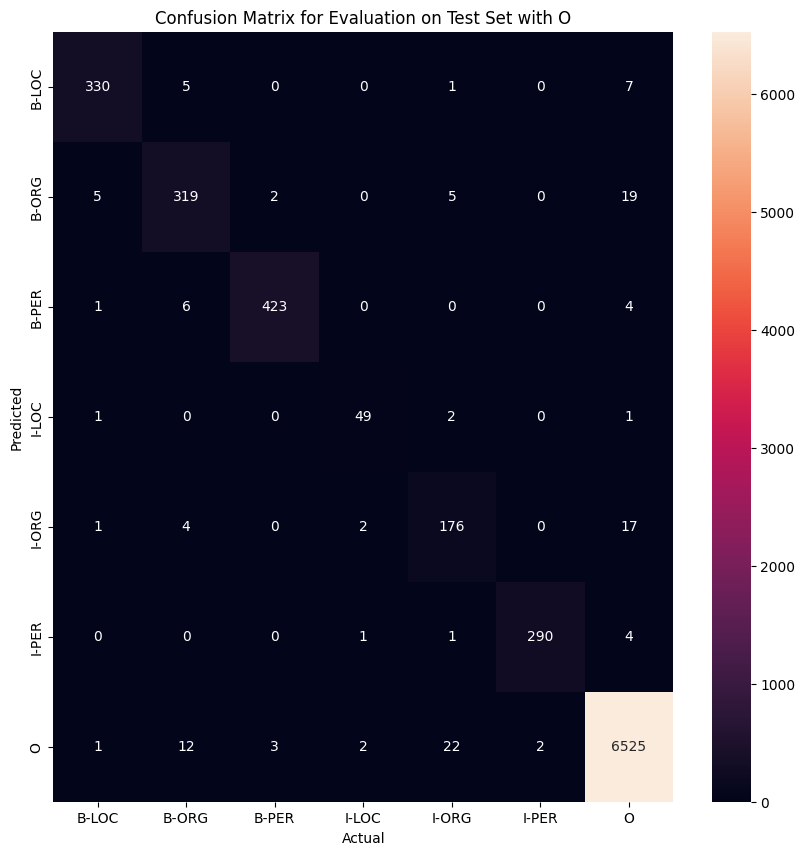

Classification Report without O For Evaluation on Test Set
              precision    recall  f1-score   support

       B-LOC       0.98      0.96      0.97       343
       B-ORG       0.96      0.91      0.93       350
       B-PER       1.00      0.97      0.98       434
       I-LOC       0.94      0.92      0.93        53
       I-ORG       0.95      0.88      0.91       200
       I-PER       1.00      0.98      0.99       296
           O       0.00      0.00      0.00         0

    accuracy                           0.95      1676
   macro avg       0.83      0.80      0.82      1676
weighted avg       0.98      0.95      0.96      1676




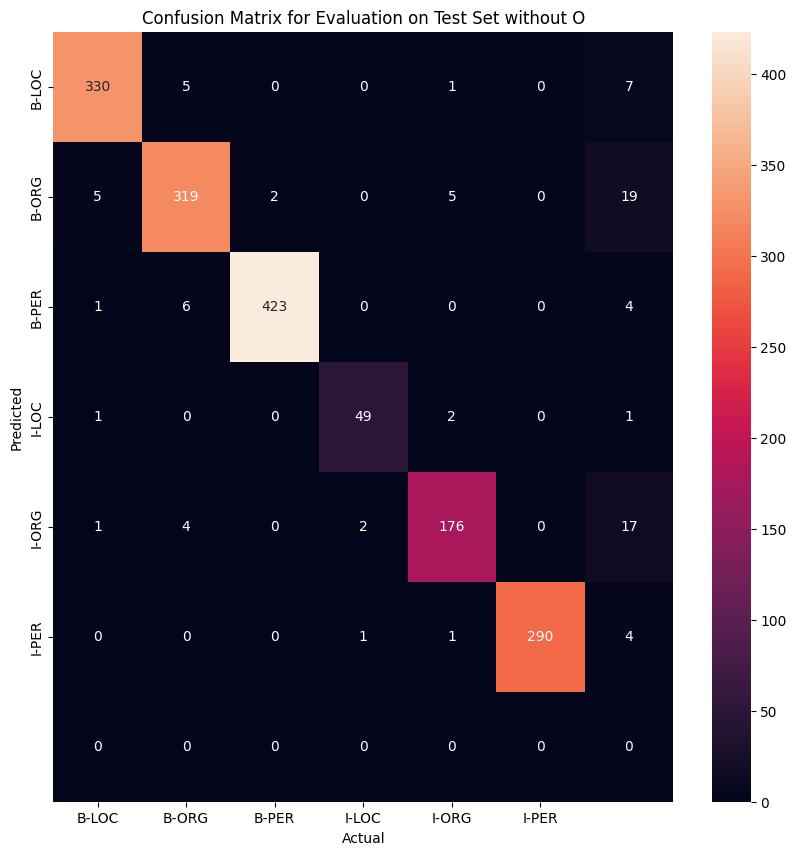

{'RECALL': 0.9841077277690161, 'PERCISION': 0.9841931506778232, 'F1': 0.9841364440947622, 'RECALL_WO_O': 0.9468973747016707, 'PERCISION_WO_O': 0.976929187918785, 'F1_WO_O': 0.9615810776543183}


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
####################
# PLACE TESTS HERE #
train_raw = read_data("data/train.txt")
dev_raw = read_data("data/dev.txt")
test_raw = read_data("data/test.txt")
def test_read_data():
    result = {
        'lengths': (len(train_raw["texts"]), len(dev_raw["texts"]), len(test_raw["texts"])),
    }
    return result

train_sequences = prepare_data(train_raw, tag2id)
dev_sequences = prepare_data(dev_raw, tag2id)
test_sequences = prepare_data(test_raw, tag2id)

def test_prepare_data():
    result = {
        'dev_texts_shape': dev_sequences["texts"].shape,
        'train_labels_shape': train_sequences["labels"].shape,
    }
    return result

train_ds = NERDataset(train_sequences)
dev_ds = NERDataset(dev_sequences)
test_ds = NERDataset(test_sequences)

N_EPOCHS = 5
def test_model():
    # Create model
    model = load_model(model_name, tag2id)

    # Train model and evaluate
    trainer = train_model(model, N_EPOCHS, BATCH_SIZE, train_ds, dev_ds)

    results_eval = evaluate(trainer, "Evaluation on Test Set", test_ds, tag2id)
    print(results_eval)

    return {
        'f1': results_eval['F1'],
        'f1_wo_o': results_eval['F1_WO_O'],
    }

TESTS = [
    test_read_data,
    test_prepare_data,
    test_model,
]

# Run tests and save results
res = {}
for test in TESTS:
    try:
        cur_res = test()
        res.update({test.__name__: cur_res})
    except Exception as e:
        res.update({test.__name__: repr(e)})

with open('results.json', 'w') as f:
    json.dump(res, f, indent=2)

# Download the results.json file
files.download('results.json')

####################
